### Introduction:

The dataset available at the following link, "https://www.kaggle.com/datasets/sbhatti/financial-sentiment-analysis," provides a valuable resource for conducting research and advancing financial sentiment analysis. This dataset combines two datasets, FiQA and Financial PhraseBank, into a single CSV file, making it easy to use and analyze. The dataset consists of financial sentences accompanied by sentiment labels, enabling researchers to explore and analyze the sentiment expressed in financial texts.

By conducting sentiment analysis on financial data, we can uncover valuable insights into market sentiments, investor sentiment, and public perception of financial events, companies, and economic indicators. This can have significant implications for various stakeholders in the financial industry, including investors, financial analysts, fund managers, and policymakers.

Through this analysis, we aim to contribute to the field of financial sentiment analysis by exploring the relationships between language, sentiment, and financial market dynamics. By understanding and quantifying the sentiment expressed in financial texts, we can enhance decision-making processes, risk assessment models, and market forecasting methodologies.

In [3]:
import pandas as pd

# Read the CSV file and create a DataFrame
df = pd.read_csv('/content/data.csv')

# Display the first few rows of the DataFrame
df.head()


,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


The "Sentence" column contains textual information related to financial topics, while the "Sentiment" column indicates the sentiment associated with each sentence, which can be either positive, negative, or neutral.

### Data Exploration:
Explore the dataset to gain insights and understand its characteristics. You can examine the distribution of sentiment labels, check for missing values, analyze the length of sentences, and identify any patterns or trends.

Distribution of Sentiment Labels

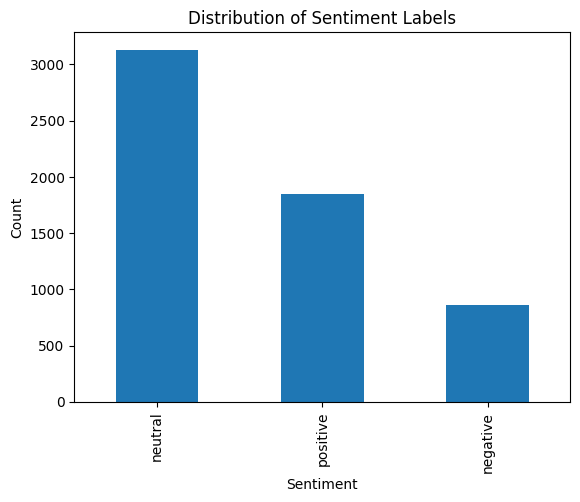

In [4]:
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment label
sentiment_counts = df['Sentiment'].value_counts()

# Visualize the distribution using a bar plot
sentiment_counts.plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Labels')
plt.show()


Missing Values

In [5]:
# Check for missing values
missing_values = df.isnull().sum()

# Print the number of missing values for each column
print(missing_values)


Sentence     0
Sentiment    0
dtype: int64


Sentence Length Analysis

count    5842.000000
mean      117.022253
std        56.420425
min         9.000000
25%        72.000000
50%       107.000000
75%       150.000000
max       315.000000
Name: Sentence Length, dtype: float64


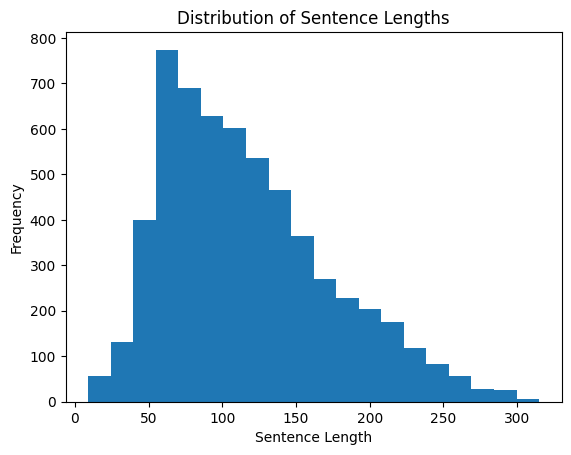

In [6]:
# Create a new column to store the length of each sentence
df['Sentence Length'] = df['Sentence'].apply(len)

# Calculate summary statistics for sentence lengths
summary_stats = df['Sentence Length'].describe()

# Print the summary statistics
print(summary_stats)

# Visualize the distribution using a histogram
plt.hist(df['Sentence Length'], bins=20)
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sentence Lengths')
plt.show()


- Count: There are 5842 sentences in the dataset.
- Mean: The average sentence length is approximately 117 characters.
- Standard Deviation (std): The standard deviation is approximately 56.42, indicating that the sentence lengths vary around the mean.
- Minimum (min): The shortest sentence in the dataset has 9 characters.
- 25th Percentile (25%): 25% of the sentences have a length of 72 characters or less.
- 50th Percentile (50% or median): 50% of the sentences have a length of 107 characters or less.
- 75th Percentile (75%): 75% of the sentences have a length of 150 characters or less.
- Maximum (max): The longest sentence in the dataset has 315 characters.

The frequency graph shows that the peak frequency occurs at around 60 characters in sentence length. This means that approximately 770 sentences in the dataset have a length of around 60 characters.

As the sentence length increases beyond 60 characters, the frequency gradually decreases. This indicates that longer sentences become less frequent in the dataset. Near the maximum length of 300 characters, the frequency of sentences drops close to zero, indicating that very long sentences are rare in the dataset.

The left-skewed distribution and the peak at around 60 characters suggest that most sentences in the dataset are relatively short. This finding can be valuable for understanding the characteristics of the dataset and informing subsequent analysis or modeling tasks.

### Sentiment Analysis:
Perform sentiment analysis on the financial sentences to classify them into positive, negative, or neutral sentiment. You can use various techniques such as rule-based approaches, machine learning algorithms, or pre-trained language models to train a sentiment analysis model on the data.


Perform sentiment analysis on the financial sentences using a rule-based approach in Python

In [8]:
# Positive keywords
positive_keywords = [
    'good', 'excellent', 'profit', 'increase', 'success', 'opportunity',
    'advantage', 'benefit', 'growth', 'impressive', 'promising', 'prosper',
    'positive', 'upward', 'bullish', 'strong', 'outperform', 'satisfactory'
]

# Negative keywords
negative_keywords = [
    'bad', 'poor', 'loss', 'decrease', 'failure', 'risk', 'downside',
    'weak', 'disappoint', 'negative', 'underperform', 'decline', 'bearish',
    'struggle', 'challenging', 'concern', 'downtrend', 'unfavorable'
]


In [10]:
# Function to classify sentiment based on keywords
def classify_sentiment(sentence):
    words = sentence.lower().split()
    positive_count = sum(word in positive_keywords for word in words)
    negative_count = sum(word in negative_keywords for word in words)

    if positive_count > negative_count:
        return 'positive'
    elif negative_count > positive_count:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment classification to the sentences
df['Sentiment'] = df['Sentence'].apply(classify_sentiment)

In [11]:
df.head()

,Sentence,Sentiment,Sentence Length
0,The GeoSolutions technology will leverage Bene...,neutral,218
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",neutral,55
2,"For the last quarter of 2010 , Componenta 's n...",neutral,193
3,According to the Finnish-Russian Chamber of Co...,neutral,128
4,The Swedish buyout firm has sold its remaining...,neutral,135


### Feature Engineering:
 Extract relevant features from the financial sentences that can be used for sentiment analysis or other tasks. This can include techniques such as word embeddings, TF-IDF (Term Frequency-Inverse Document Frequency), or other text representation methods.

 Using TF-IDF to extract features from the financial sentences

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Apply TF-IDF vectorization to the sentences
X = tfidf_vectorizer.fit_transform(df['Sentence'])

# Get the feature names from the vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Convert the TF-IDF matrix to a DataFrame for further analysis
tfidf_df = pd.DataFrame(X.toarray(), columns=feature_names)

# Concatenate the TF-IDF features with the original DataFrame
df_with_features = pd.concat([df, tfidf_df], axis=1)



Let's print some sample features and their corresponding TF-IDF values from the dataset.

In [19]:
import numpy as np

# Get the feature names from the vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Select a random sentence index
random_sentence_index = np.random.randint(0, len(df))

# Get the TF-IDF values for the random sentence
random_sentence_tfidf = tfidf_df.iloc[random_sentence_index]

# Print the top 10 features and their TF-IDF values for the random sentence
print("Random Sentence:")
print(df['Sentence'].iloc[random_sentence_index])
print("\nTop 10 Features and TF-IDF Values:")
top_10_features = random_sentence_tfidf.sort_values(ascending=False)[:10]
for feature, tfidf in zip(top_10_features.index, top_10_features.values):
    print(f"{feature}: {tfidf}")


Random Sentence:
At the close , the OMX Helsinki 25 was 0.01 pct lower at 3,067.64 points and the OMX Helsinki was down 0.05 pct at 10,321.46 points on over 1.343 bln eur of turnover .

Top 10 Features and TF-IDF Values:
points: 0.35886229880344017
pct: 0.29325221792461725
at: 0.2886389364436075
omx: 0.28646669569439437
helsinki: 0.25238775927744656
067: 0.2353362755245297
343: 0.2353362755245297
321: 0.2120809787326196
was: 0.20563265371210737
05: 0.19967560313852853


These values represent the importance of each feature (word) in the sentence based on their TF-IDF scores. Higher TF-IDF values indicate that a word is more relevant to the sentence.

Among the top 10 features, the highest TF-IDF value is associated with the feature "points" with a value of 0.35886229880344017.

### Model Training and Evaluation:
Build a sentiment analysis model using the labeled data. Split the data into training and testing sets, select an appropriate machine learning algorithm or deep learning architecture, train the model on the training set, and evaluate its performance on the testing set using appropriate metrics such as accuracy, precision, recall, and F1-score.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Sentence'], df['Sentiment'], test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Transform the training data into TF-IDF features
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data into TF-IDF features
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Create a LinearSVC classifier
classifier = LinearSVC()

# Train the classifier on the training data
classifier.fit(X_train_tfidf, y_train)

# Make predictions on the testing data
y_pred = classifier.predict(X_test_tfidf)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


Accuracy: 0.9692044482463644
Precision: 0.9687863317186369
Recall: 0.9692044482463644
F1-score: 0.9674936818365961


These metrics indicate that the model performed well in classifying the sentiment of financial sentences. The high accuracy suggests that the model made correct predictions for the majority of the test data. Precision indicates the model's ability to correctly classify positive, negative, and neutral sentiments, while recall represents the model's ability to correctly identify all instances of each sentiment class. The F1-score combines both precision and recall into a single metric.

The evaluation metrics indicate that the sentiment analysis model built using the provided data performed with high accuracy and good precision, recall, and F1-score.

Visualizations: Create visualizations to better understand the sentiment distribution or visualize the results of the sentiment analysis. This can include bar plots, pie charts, word clouds, or any other relevant visual representation of the data.

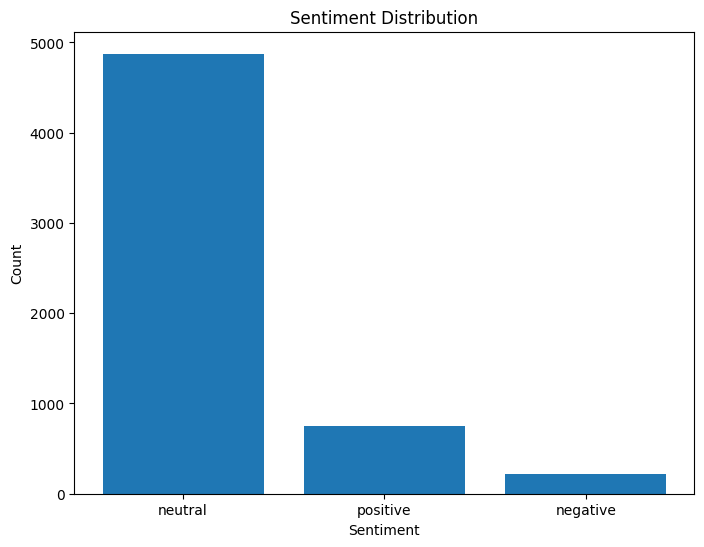

In [24]:
import matplotlib.pyplot as plt

# Count the number of sentences for each sentiment label
sentiment_counts = df['Sentiment'].value_counts()

# Plot the sentiment distribution
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()


The majority of sentences in the dataset are classified as "neutral" sentiment, with a count of approximately 4900. This suggests that a significant portion of the financial sentences in the dataset do not convey a strong positive or negative sentiment.

On the other hand, the count of sentences with "positive" sentiment is relatively low, around 600. This indicates that there are fewer financial sentences in the dataset that express a positive sentiment.

Similarly, the count of sentences with "negative" sentiment is even lower, around 200. This suggests that negative sentiment is less prevalent in the financial sentences compared to neutral sentiment.